In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
data['Product_ID'].nunique()

3631

In [5]:
data.shape

(550068, 12)

In [6]:
data['User_ID'].nunique()

5891

<AxesSubplot:>

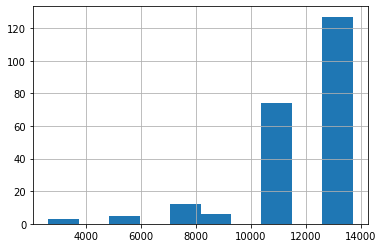

In [7]:
data[data.Product_ID=='P00069042'].Purchase.hist()

# Feature Analysis

## 1. Gender

In [8]:
data.groupby("Gender").agg({"User_ID":'count','Purchase':'mean'})

,User_ID,Purchase
Gender,,
F,135809,8734.565765
M,414259,9437.526040


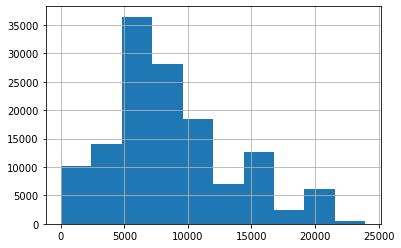

In [9]:
female_dist=data[data.Gender=='F'].Purchase.hist()

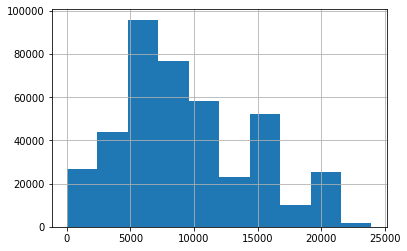

In [10]:
male_dist=data[data.Gender=='M'].Purchase.hist()

## 2. Age

In [11]:
data.groupby("Age").agg({"User_ID":'count','Purchase':'mean'})

,User_ID,Purchase
Age,,
0-17,15102,8933.464640
18-25,99660,9169.663606
26-35,219587,9252.690633
36-45,110013,9331.350695
46-50,45701,9208.625697
51-55,38501,9534.808031
55+,21504,9336.280459


## 3. Occupation

In [12]:
data.groupby("Occupation").agg({"User_ID":'count','Purchase':'mean'})

,User_ID,Purchase
Occupation,,
0,69638,9124.428588
1,47426,8953.193270
2,26588,8952.481683
3,17650,9178.593088
4,72308,9213.980251
5,12177,9333.149298
6,20355,9256.535691
7,59133,9425.728223
8,1546,9532.592497


## 4. city

In [13]:
data.groupby("City_Category").agg({"User_ID":'count','Purchase':'mean'})

,User_ID,Purchase
City_Category,,
A,147720,8911.939216
B,231173,9151.300563
C,171175,9719.920993


## 5. Stay_in_current_city_years

In [14]:
data.groupby("Stay_In_Current_City_Years").agg({"User_ID":'count','Purchase':'mean'})

,User_ID,Purchase
Stay_In_Current_City_Years,,
0,74398,9180.075123
1,193821,9250.145923
2,101838,9320.429810
3,95285,9286.904119
4+,84726,9275.598872


## 6. Marital status

In [15]:
data.groupby("Marital_Status").agg({'User_ID':'count','Purchase':'mean'})

,User_ID,Purchase
Marital_Status,,
0,324731,9265.907619
1,225337,9261.174574


## 7. Product_Category_1

In [16]:
data['Product_Category_1'].describe()

count    550068.000000
mean          5.404270
std           3.936211
min           1.000000
25%           1.000000
50%           5.000000
75%           8.000000
max          20.000000
Name: Product_Category_1, dtype: float64

<AxesSubplot:>

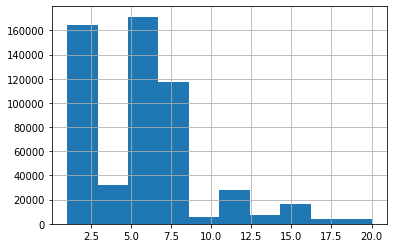

In [17]:
data['Product_Category_1'].hist()

In [18]:
data.groupby(pd.cut(data['Product_Category_1'],[0,3,5,8,11,15,18,21])).agg({'User_ID':'count','Purchase':'mean'})

,User_ID,Purchase
Product_Category_1,,
"(0, 3]",184455,12917.051059
"(3, 5]",162686,5957.585269
"(5, 8]",138112,8973.628881
"(8, 11]",29822,7410.594192
"(11, 15]",17309,7067.085505
"(15, 18]",13531,11846.095041
"(18, 21]",4153,241.778233


## 8. Product_Category_2

In [19]:
data['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [20]:
data=data.fillna({'Product_Category_2':0})

In [21]:
data.groupby(pd.cut(data['Product_Category_2'],[-1,0,3,5,8,11,15,18])).agg({'User_ID':'count','Purchase':'mean'})

,User_ID,Purchase
Product_Category_2,,
"(-1, 0]",173638,7518.695389
"(0, 3]",52101,13487.392584
"(3, 5]",51912,9615.125289
"(5, 8]",81180,10496.673380
"(8, 11]",22870,9419.031439
"(11, 15]",109022,8476.820376
"(15, 18]",59345,10055.461825


## 10. Product_Category_3

In [22]:
data['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [23]:
data=data.fillna({'Product_Category_3':0})

In [24]:
data.groupby(pd.cut(data['Product_Category_3'],[-1,0,3,5,8,11,15,18])).agg({'User_ID':'count','Purchase':'mean'})

,User_ID,Purchase
Product_Category_3,,
"(-1, 0]",383247,8221.836943
"(0, 3]",613,13939.696574
"(3, 5]",18533,11882.726434
"(5, 8]",17452,13072.382077
"(8, 11]",15110,10981.118531
"(11, 15]",61146,11177.725035
"(15, 18]",53967,11831.558323


## 11. Mean product purchase

In [25]:
mean_prods=data.groupby("Product_ID").agg({'Purchase':'mean'}).reset_index()
mean_prods.columns=['Product_ID','mean_prod_purchase']

In [330]:
std_prods=data.groupby("Product_ID").agg({'Purchase':'std'}).reset_index()
std_prods.columns=['Product_ID','std_prod_purchase']

## 12. Mean User Purchase

In [26]:
mean_user=data.groupby("User_ID").agg({'Purchase':'mean'}).reset_index()
mean_user.columns=['User_ID','mean_user_purchase']

In [331]:
std_user=data.groupby("User_ID").agg({'Purchase':'std'}).reset_index()
std_user.columns=['User_ID','std_user_purchase']

# Pre-processing

In [27]:
data['Occupation']=data['Occupation'].apply(lambda x: str(x))

In [28]:
data=data.merge(mean_prods,on=['Product_ID'])
data=data.merge(mean_user,on=['User_ID'])

In [30]:
cat_cols=['Gender', 'City_Category','Age','Marital_Status','Occupation',"Stay_In_Current_City_Years"]
num_cols=['Product_Category_1', 
           'Product_Category_2', 'Product_Category_3','mean_prod_purchase','mean_user_purchase']

In [31]:
data_cat=pd.get_dummies(data[cat_cols])
data_num=data[num_cols]
Purchase=data['Purchase']

In [32]:
data=pd.concat([data_cat,data_num],axis=1)
data['Purchase']=Purchase

# train-validation split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
train,validation=train_test_split(data,test_size=0.2)

# AutoMl

In [220]:
import h2o
from h2o.automl import H2OAutoML

h2o.init(max_mem_size="1G")

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 14.0.2+12-46, mixed mode, sharing)
  Starting server from C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\imayu\AppData\Local\Temp\tmp2lra2ek3
  JVM stdout: C:\Users\imayu\AppData\Local\Temp\tmp2lra2ek3\h2o_imayu_started_from_python.out
  JVM stderr: C:\Users\imayu\AppData\Local\Temp\tmp2lra2ek3\h2o_imayu_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.2
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_imayu_wv0q2x
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [221]:
hf_train=h2o.H2OFrame(train)
hf_validation=h2o.H2OFrame(validation)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [163]:
train.columns

Index(['Marital_Status', 'Gender_F', 'Gender_M', 'City_Category_A',
       'City_Category_B', 'City_Category_C', 'Age_0-17', 'Age_18-25',
       'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+',
       'Occupation_0', 'Occupation_1', 'Occupation_10', 'Occupation_11',
       'Occupation_12', 'Occupation_13', 'Occupation_14', 'Occupation_15',
       'Occupation_16', 'Occupation_17', 'Occupation_18', 'Occupation_19',
       'Occupation_2', 'Occupation_20', 'Occupation_3', 'Occupation_4',
       'Occupation_5', 'Occupation_6', 'Occupation_7', 'Occupation_8',
       'Occupation_9', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'mean_prod_purchase', 'mean_user_purchase', 'Purchase'],
      dtype='object')

In [171]:
features=['Marital_Status', 'Gender_F', 'Gender_M', 'City_Category_A',
       'City_Category_B', 'City_Category_C', 'Age_0-17', 'Age_18-25',
       'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+',
       'Occupation_0', 'Occupation_1', 'Occupation_10', 'Occupation_11',
       'Occupation_12', 'Occupation_13', 'Occupation_14', 'Occupation_15',
       'Occupation_16', 'Occupation_17', 'Occupation_18', 'Occupation_19',
       'Occupation_2', 'Occupation_20', 'Occupation_3', 'Occupation_4',
       'Occupation_5', 'Occupation_6', 'Occupation_7', 'Occupation_8',
       'Occupation_9', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3','mean_prod_purchase','mean_user_purchase']
target=['Purchase']

In [224]:
aml = H2OAutoML(max_runtime_secs = 600,max_models=20, seed=1,nfolds=0)
aml.train(x=features, y='Purchase', training_frame=hf_train,leaderboard_frame=hf_validation)

AutoML progress: |
19:03:21.851: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [225]:
aml.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_grid__1_AutoML_20201211_190321_model_4,6.69655e+06,2587.77,6.69655e+06,1905.48,nan
GBM_4_AutoML_20201211_190321,6.70704e+06,2589.8,6.70704e+06,1907.49,nan
GBM_3_AutoML_20201211_190321,6.78072e+06,2603.98,6.78072e+06,1919.82,nan
GBM_5_AutoML_20201211_190321,6.78907e+06,2605.59,6.78907e+06,1918.95,nan
GBM_2_AutoML_20201211_190321,6.80546e+06,2608.73,6.80546e+06,1924.49,nan
GBM_1_AutoML_20201211_190321,6.84526e+06,2616.34,6.84526e+06,1931.26,nan
GBM_grid__1_AutoML_20201211_190321_model_6,6.89696e+06,2626.21,6.89696e+06,1939.01,0.351684
DeepLearning_1_AutoML_20201211_190321,6.9402e+06,2634.43,6.9402e+06,1943.78,nan
XRT_1_AutoML_20201211_190321,6.94893e+06,2636.08,6.94893e+06,1936.11,0.340221
GBM_grid__1_AutoML_20201211_190321_model_1,6.97523e+06,2641.07,6.97523e+06,1953.69,nan


In [43]:
mdl=aml.leader

In [172]:
test_data=pd.read_csv("test.csv")
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [173]:
test_data=test_data.merge(mean_prods,on=['Product_ID'])
test_data=test_data.merge(mean_user,on=['User_ID'])
# test_data=test_data.merge(std_prods,on=['Product_ID'])
# test_data=test_data.merge(std_user,on=['User_ID'])
cat_cols=['Gender', 'City_Category','Age','Marital_Status','Occupation',"Stay_In_Current_City_Years"]
num_cols=['Product_Category_1', 
           'Product_Category_2', 'Product_Category_3','mean_prod_purchase','mean_user_purchase']
test_data=test_data.fillna({'Product_Category_3':0,'Product_Category_2':0,'Product_Category_1':0})
test_data['Occupation']=test_data['Occupation'].apply(lambda x: str(x))
test_data_cat=pd.get_dummies(test_data[cat_cols])
test_data_num=test_data[num_cols]
test=pd.concat([test_data_cat,test_data_num],axis=1)
test.columns

Index(['Marital_Status', 'Gender_F', 'Gender_M', 'City_Category_A',
       'City_Category_B', 'City_Category_C', 'Age_0-17', 'Age_18-25',
       'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+',
       'Occupation_0', 'Occupation_1', 'Occupation_10', 'Occupation_11',
       'Occupation_12', 'Occupation_13', 'Occupation_14', 'Occupation_15',
       'Occupation_16', 'Occupation_17', 'Occupation_18', 'Occupation_19',
       'Occupation_2', 'Occupation_20', 'Occupation_3', 'Occupation_4',
       'Occupation_5', 'Occupation_6', 'Occupation_7', 'Occupation_8',
       'Occupation_9', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'mean_prod_purchase', 'mean_user_purchase'],
      dtype='object')

In [54]:
hf_test=h2o.H2OFrame(test)
hf_test['pred']=mdl.predict(hf_test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


In [57]:
test_data['Purchase']=h2o.as_list(hf_test['pred'])

In [58]:
test_data[['Purchase','User_ID','Product_ID']].to_csv("gbm-submit.csv",index=False)

In [250]:
h2o.shutdown()

C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  """Entry point for launching an IPython kernel.


H2O session _sid_9dad closed.


# Xgboost

In [160]:
from xgboost.sklearn import XGBRegressor

In [161]:
features

['Marital_Status',
 'Gender_F',
 'Gender_M',
 'City_Category_A',
 'City_Category_B',
 'City_Category_C',
 'Age_0-17',
 'Age_18-25',
 'Age_26-35',
 'Age_36-45',
 'Age_46-50',
 'Age_51-55',
 'Age_55+',
 'Occupation_0',
 'Occupation_1',
 'Occupation_10',
 'Occupation_11',
 'Occupation_12',
 'Occupation_13',
 'Occupation_14',
 'Occupation_15',
 'Occupation_16',
 'Occupation_17',
 'Occupation_18',
 'Occupation_19',
 'Occupation_2',
 'Occupation_20',
 'Occupation_3',
 'Occupation_4',
 'Occupation_5',
 'Occupation_6',
 'Occupation_7',
 'Occupation_8',
 'Occupation_9',
 'Stay_In_Current_City_Years_0',
 'Stay_In_Current_City_Years_1',
 'Stay_In_Current_City_Years_2',
 'Stay_In_Current_City_Years_3',
 'Stay_In_Current_City_Years_4+',
 'mean_prod_purchase',
 'mean_user_purchase']

In [162]:
xgb_reg = XGBRegressor(n_estimators=1000,max_depth=10,booster='dart',
                       colsample_bytree=0.8,colsample_bynode=0.8,subsample=0.8,reg_lambda =1e-4,min_child_weight=40, seed=0,)

xgb_reg.fit(train[features], train['Purchase'], eval_set=[ (validation[features], validation['Purchase'])],
        eval_metric='rmse',early_stopping_rounds=10,
        verbose=True)

[0]	validation_0-rmse:7599.68457
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:5619.17090
[2]	validation_0-rmse:4336.47168
[3]	validation_0-rmse:3660.94458
[4]	validation_0-rmse:3129.15479
[5]	validation_0-rmse:2829.25537
[6]	validation_0-rmse:2710.48462
[7]	validation_0-rmse:2605.64404
[8]	validation_0-rmse:2575.05078
[9]	validation_0-rmse:2535.53784
[10]	validation_0-rmse:2515.37158
[11]	validation_0-rmse:2505.30127
[12]	validation_0-rmse:2498.79810
[13]	validation_0-rmse:2494.83154
[14]	validation_0-rmse:2492.44067
[15]	validation_0-rmse:2490.93359
[16]	validation_0-rmse:2489.98999
[17]	validation_0-rmse:2489.64356
[18]	validation_0-rmse:2488.47070
[19]	validation_0-rmse:2487.61694
[20]	validation_0-rmse:2487.23413
[21]	validation_0-rmse:2486.94653
[22]	validation_0-rmse:2486.59082
[23]	validation_0-rmse:2486.13965
[24]	validation_0-rmse:2485.85278
[25]	validation_0-rmse:2484.96558
[26]	validation_0-rmse:2484.50073
[27]	validation_0-rmse:2484

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=0.8, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=40, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=0.0001, scale_pos_weight=1, seed=0,
             subsample=0.8, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [177]:
xgb_reg.get_booster().get_score(importance_type='gain')

{'mean_prod_purchase': 1466012828.707041,
 'Age_18-25': 33792727.35155354,
 'City_Category_C': 36907087.33786599,
 'Gender_M': 58845158.27376142,
 'Stay_In_Current_City_Years_1': 24790277.82850705,
 'Age_26-35': 27493405.026576973,
 'mean_user_purchase': 127758763.84763049,
 'Occupation_0': 30511459.523436293,
 'Age_36-45': 28036208.26723333,
 'Stay_In_Current_City_Years_4+': 30157777.600400656,
 'Age_0-17': 35016336.6845,
 'Occupation_1': 39170218.85245901,
 'City_Category_A': 27637628.412257567,
 'Occupation_3': 36829357.837504,
 'Stay_In_Current_City_Years_2': 26240941.151524745,
 'City_Category_B': 25294832.064240802,
 'Occupation_10': 34294383.22131147,
 'Stay_In_Current_City_Years_0': 31393372.035795253,
 'Occupation_4': 36816983.17577771,
 'Marital_Status': 22665042.828725,
 'Occupation_12': 31271205.343195267,
 'Occupation_14': 42002756.50590551,
 'Occupation_16': 31366658.083333332,
 'Occupation_7': 29180723.41815,
 'Occupation_17': 30385541.710275,
 'Occupation_15': 40164222.

In [167]:
test_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,mean_prod_purchase,mean_user_purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,0.0,15781.118590,14747.714286
1,1001666,P00128942,M,26-35,14,B,3,0,1,11.0,0.0,15781.118590,9060.273543
2,1001666,P00265242,M,26-35,14,B,3,0,5,8.0,0.0,7534.848404,9060.273543
3,1001666,P00346442,M,26-35,14,B,3,0,1,2.0,14.0,10203.065327,9060.273543
4,1001666,P00260242,M,26-35,14,B,3,0,5,16.0,0.0,4716.666667,9060.273543
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233533,1001936,P00013942,M,36-45,0,C,1,0,5,0.0,0.0,6017.487288,8315.052632
233534,1001936,P00242342,M,36-45,0,C,1,0,8,0.0,0.0,8004.653061,8315.052632
233535,1001936,P00009542,M,36-45,0,C,1,0,8,0.0,0.0,7320.035714,8315.052632
233536,1004943,P00105642,F,51-55,0,C,1,0,8,0.0,0.0,8542.080000,7998.615385


In [168]:
pred=xgb_reg.predict(test)

In [169]:
test_data['Purchase']=pred

In [170]:
test_data[['Purchase','User_ID','Product_ID']].to_csv("xgb.csv",index=False)